### 

In [1]:
# import libraries
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings("ignore")

In [2]:
corona = pd.read_csv('corona_tested_individuals_ver_0083.csv')

corona.head()

,test_date,cough,fever,sore_throat,shortness_of_breath,head_ache,corona_result,age_60_and_above,gender,test_indication
0,2020-11-12,0,0,0,0,0,negative,No,male,Other
1,2020-11-12,0,1,0,0,0,negative,No,male,Other
2,2020-11-12,0,0,0,0,0,negative,Yes,female,Other
3,2020-11-12,0,0,0,0,0,negative,No,male,Other
4,2020-11-12,0,1,0,0,0,negative,No,male,Contact with confirmed


## Cleaning the Data

In [3]:
corona.shape

(2742596, 10)

In [4]:
corona.dtypes

test_date              object
cough                   int64
fever                   int64
sore_throat             int64
shortness_of_breath     int64
head_ache               int64
corona_result          object
age_60_and_above       object
gender                 object
test_indication        object
dtype: object

In [5]:
corona.isnull().sum()

test_date                   0
cough                       0
fever                       0
sore_throat                 0
shortness_of_breath         0
head_ache                   0
corona_result               0
age_60_and_above       547644
gender                  92886
test_indication             0
dtype: int64

In [6]:
corona.columns

Index(['test_date', 'cough', 'fever', 'sore_throat', 'shortness_of_breath',
       'head_ache', 'corona_result', 'age_60_and_above', 'gender',
       'test_indication'],
      dtype='object')

In [7]:
corona['age_60_and_above'].value_counts()

No     1908553
Yes     286399
Name: age_60_and_above, dtype: int64

In [8]:
corona['gender'].value_counts()

female    1371444
male      1278266
Name: gender, dtype: int64

In [9]:
corona['age_60_and_above'].fillna('No', inplace=True)

corona['gender'].fillna('female', inplace=True)

In [10]:
corona.isnull().sum()

test_date              0
cough                  0
fever                  0
sore_throat            0
shortness_of_breath    0
head_ache              0
corona_result          0
age_60_and_above       0
gender                 0
test_indication        0
dtype: int64

In [11]:
corona.duplicated().sum()

2698015

In [12]:
corona = corona.drop_duplicates()

In [13]:
corona.duplicated().sum()

0

In [14]:
corona.shape

(44581, 10)

In [15]:
corona.head()

,test_date,cough,fever,sore_throat,shortness_of_breath,head_ache,corona_result,age_60_and_above,gender,test_indication
0,2020-11-12,0,0,0,0,0,negative,No,male,Other
1,2020-11-12,0,1,0,0,0,negative,No,male,Other
2,2020-11-12,0,0,0,0,0,negative,Yes,female,Other
4,2020-11-12,0,1,0,0,0,negative,No,male,Contact with confirmed
5,2020-11-12,1,0,0,0,0,negative,No,male,Other


In [16]:
corona = corona.drop("test_date", axis=1)

In [17]:
corona['test_indication'].unique()

array(['Other', 'Contact with confirmed', 'Abroad'], dtype=object)

In [18]:
corona.to_csv('corona_clean.csv', index = None)

## Visualizing the Data

In [19]:
# importing visualizing libraries
import seaborn as sns
import matplotlib.pyplot as plt

In [20]:
df = pd.read_csv('corona_clean.csv')

df.head()

,cough,fever,sore_throat,shortness_of_breath,head_ache,corona_result,age_60_and_above,gender,test_indication
0,0,0,0,0,0,negative,No,male,Other
1,0,1,0,0,0,negative,No,male,Other
2,0,0,0,0,0,negative,Yes,female,Other
3,0,1,0,0,0,negative,No,male,Contact with confirmed
4,1,0,0,0,0,negative,No,male,Other


In [21]:
df.shape

(44581, 9)

In [22]:
df['gender'].value_counts()

female    23613
male      20968
Name: gender, dtype: int64

In [23]:
df = df[['cough', 'fever', 'sore_throat', 'shortness_of_breath',
       'head_ache','gender', 'age_60_and_above', 
       'test_indication', 'corona_result']]

df

,cough,fever,sore_throat,shortness_of_breath,head_ache,gender,age_60_and_above,test_indication,corona_result
0,0,0,0,0,0,male,No,Other,negative
1,0,1,0,0,0,male,No,Other,negative
2,0,0,0,0,0,female,Yes,Other,negative
3,0,1,0,0,0,male,No,Contact with confirmed,negative
4,1,0,0,0,0,male,No,Other,negative
...,...,...,...,...,...,...,...,...,...
44576,1,1,1,0,0,male,No,Other,other
44577,1,1,0,0,0,female,No,Other,negative
44578,0,1,0,1,0,male,No,Other,negative
44579,0,0,1,0,0,female,No,Abroad,positive


In [24]:
columns = df.columns[5:]

columns

Index(['gender', 'age_60_and_above', 'test_indication', 'corona_result'], dtype='object')

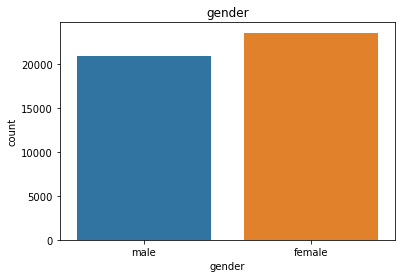

<Figure size 864x576 with 0 Axes>

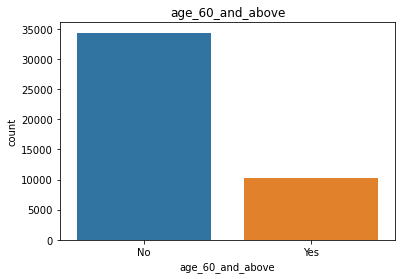

<Figure size 864x576 with 0 Axes>

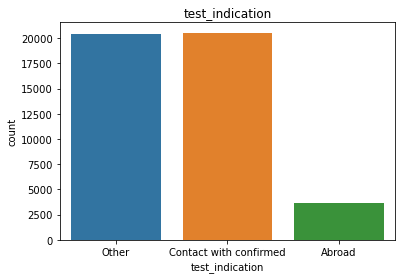

<Figure size 864x576 with 0 Axes>

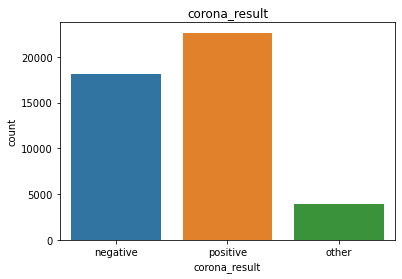

<Figure size 864x576 with 0 Axes>

In [25]:
for column in columns:
    sns.countplot(x=df[column], data=df)
    plt.title(column)
    plt.figure(figsize=(12,8))
    sns.despine()
    plt.show()

### observations
1. The number of females tested were more compared to male.
2. Majority of those tested were of age 60 and below.
3. Most of those tested were either in contact with infected people or from other ways with less having travelled from abroad.
4. Majority of those tested were found to be positive preceded by negative then finally came others whose result were unclear.. 

[Text(0, 0.5, 'Number of people tested'), Text(0.5, 1.0, 'Age and Gender')]

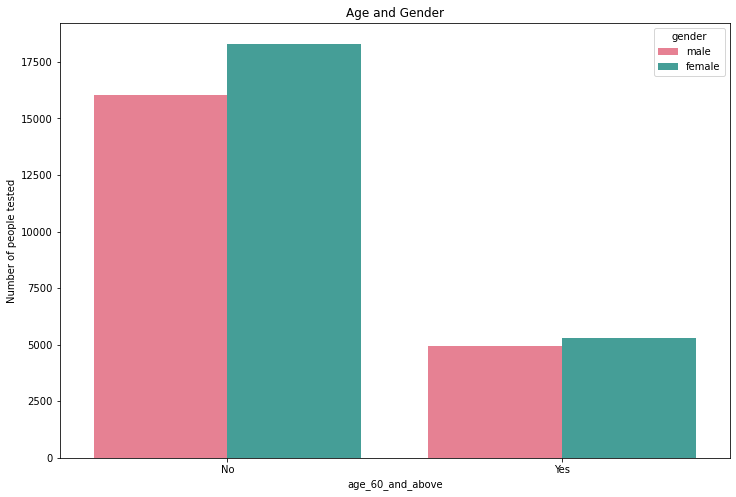

In [26]:
plt.figure(figsize=(12,8))

sns.countplot(x='age_60_and_above', hue='gender', data=df, palette='husl').set(ylabel='Number of people tested',
                                                              title='Age and Gender')

[Text(0, 0.5, 'Number of people tested'), Text(0.5, 1.0, 'Status and Gender')]

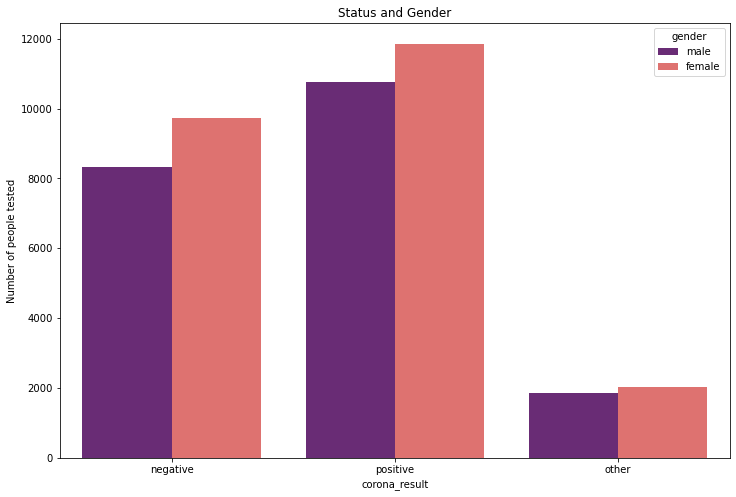

In [27]:
plt.figure(figsize=(12,8))

sns.countplot(x='corona_result', hue='gender', data=df, palette='magma').set(ylabel='Number of people tested',
                                                              title='Status and Gender')

[Text(0, 0.5, 'Number of people tested'), Text(0.5, 1.0, 'Status and Gender')]

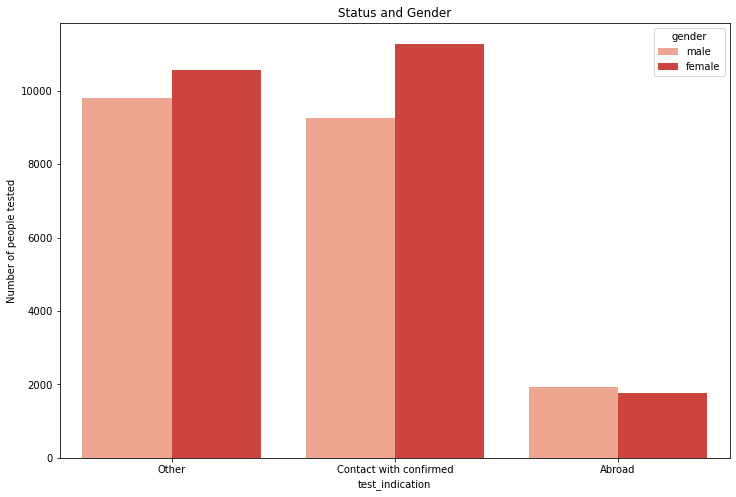

In [28]:
plt.figure(figsize=(12,8))

sns.countplot(x='test_indication', hue='gender', data=df, palette='Reds').set(ylabel='Number of people tested',
                                                              title='Status and Gender')

[Text(0, 0.5, 'Number of people tested'),
 Text(0.5, 1.0, 'Status and test indication')]

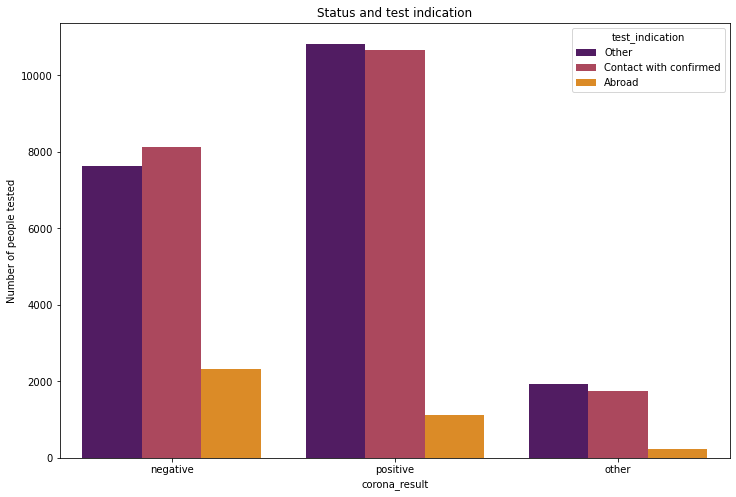

In [29]:
plt.figure(figsize=(12,8))

sns.countplot(x='corona_result', hue='test_indication', data=df, palette='inferno').set(ylabel='Number of people tested',
                                                              title='Status and test indication')

[Text(0, 0.5, 'Number of people tested'),
 Text(0.5, 1.0, 'Status and Age Over 60')]

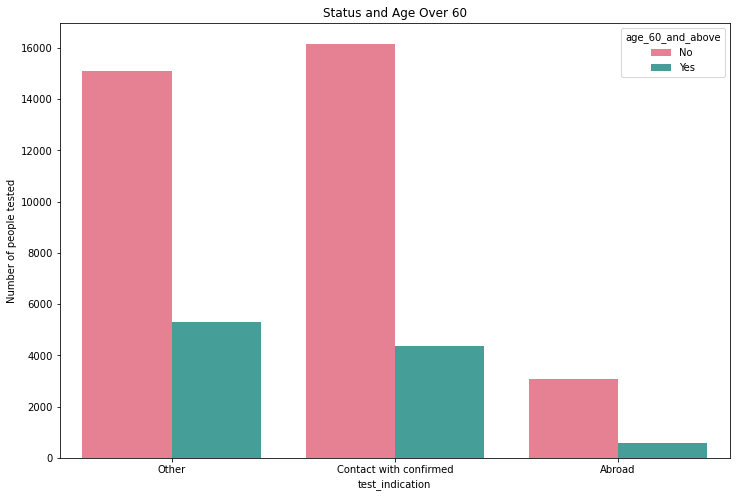

In [30]:
plt.figure(figsize=(12,8))

sns.countplot(x='test_indication', hue='age_60_and_above', data=df, palette='husl').set(ylabel='Number of people tested',
                                                              title='Status and Age Over 60')

In [31]:
df.dtypes

cough                   int64
fever                   int64
sore_throat             int64
shortness_of_breath     int64
head_ache               int64
gender                 object
age_60_and_above       object
test_indication        object
corona_result          object
dtype: object

In [32]:
columns

Index(['gender', 'age_60_and_above', 'test_indication', 'corona_result'], dtype='object')

In [33]:
cat_column = ['gender',  'age_60_and_above', 'test_indication', 'corona_result']

### Feature Extraction

In [34]:
from sklearn.preprocessing import LabelEncoder

In [35]:
encoder = LabelEncoder()

df['corona_result'] = encoder.fit_transform(df['corona_result'])
df['gender'] = encoder.fit_transform(df['gender'])
df['age_60_and_above']= encoder.fit_transform(df['age_60_and_above'])
df['test_indication'] = encoder.fit_transform(df['test_indication'])


In [36]:
df.head

<bound method NDFrame.head of        cough  fever  sore_throat  shortness_of_breath  head_ache  gender  \
0          0      0            0                    0          0       1   
1          0      1            0                    0          0       1   
2          0      0            0                    0          0       0   
3          0      1            0                    0          0       1   
4          1      0            0                    0          0       1   
...      ...    ...          ...                  ...        ...     ...   
44576      1      1            1                    0          0       1   
44577      1      1            0                    0          0       0   
44578      0      1            0                    1          0       1   
44579      0      0            1                    0          0       0   
44580      0      0            0                    0          0       1   

       age_60_and_above  test_indication  corona_result  

In [37]:
df.corr()

,cough,fever,sore_throat,shortness_of_breath,head_ache,gender,age_60_and_above,test_indication,corona_result
cough,1.000000,0.058046,0.040378,0.075904,0.033934,-0.012347,-0.025202,-0.018928,0.014014
fever,0.058046,1.000000,0.000949,0.025023,0.036807,0.028857,-0.014806,0.034824,0.025108
sore_throat,0.040378,0.000949,1.000000,-0.024436,0.120690,-0.041530,-0.150113,0.037399,0.057196
shortness_of_breath,0.075904,0.025023,-0.024436,1.000000,0.031364,-0.041515,-0.068978,0.053973,0.103512
head_ache,0.033934,0.036807,0.120690,0.031364,1.000000,-0.028300,-0.127318,0.067562,0.067610
gender,-0.012347,0.028857,-0.041530,-0.041515,-0.028300,1.000000,0.011863,0.001932,0.013738
age_60_and_above,-0.025202,-0.014806,-0.150113,-0.068978,-0.127318,0.011863,1.000000,0.072397,0.101324
test_indication,-0.018928,0.034824,0.037399,0.053973,0.067562,0.001932,0.072397,1.000000,0.101210
corona_result,0.014014,0.025108,0.057196,0.103512,0.067610,0.013738,0.101324,0.101210,1.000000


<AxesSubplot:>

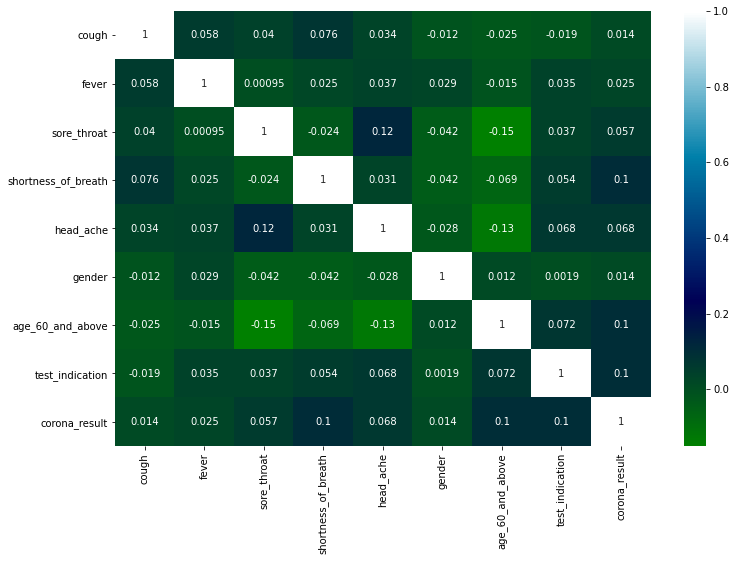

In [38]:
corr_matrix = df.corr()

# plot heatmap of correlation
plt.figure(figsize=(12,8))
sns.heatmap(corr_matrix, annot=True, cmap='ocean')

In [39]:
df.columns

Index(['cough', 'fever', 'sore_throat', 'shortness_of_breath', 'head_ache',
       'gender', 'age_60_and_above', 'test_indication', 'corona_result'],
      dtype='object')

In [40]:
df.drop(['cough', 'fever', 'sore_throat',
       'gender'], axis=1, inplace = True)

In [41]:
df.head()

,shortness_of_breath,head_ache,age_60_and_above,test_indication,corona_result
0,0,0,0,2,0
1,0,0,0,2,0
2,0,0,1,2,0
3,0,0,0,1,0
4,0,0,0,2,0


In [42]:
df['corona_result'].mode()

0    2
dtype: int32

# modelling

In [43]:
from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import confusion_matrix , classification_report, accuracy_score

In [44]:
x = df.drop('corona_result', axis=1)

y = df['corona_result']

In [45]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, stratify = y)

In [46]:
dummy = DummyClassifier()
dummy.fit(x_train, y_train)
dummy_pred = dummy.predict(x_test)

In [47]:
confusion_matrix(y_test, dummy_pred)

array([[   0,    0, 3615],
       [   0,    0,  778],
       [   0,    0, 4524]], dtype=int64)

In [48]:
print(classification_report(y_test, dummy_pred))

print( f'Accuracy: {accuracy_score(y_test, dummy_pred)*100}')

              precision    recall  f1-score   support

           0       0.00      0.00      0.00      3615
           1       0.00      0.00      0.00       778
           2       0.51      1.00      0.67      4524

    accuracy                           0.51      8917
   macro avg       0.17      0.33      0.22      8917
weighted avg       0.26      0.51      0.34      8917

Accuracy: 50.734551979365264


In [49]:
# logistic regression
logr= LogisticRegression()
logr.fit(x_train, y_train)
logr_pred = logr.predict(x_test)

In [50]:
# confussion matrix of logistic regression model
confusion_matrix(y_test, logr_pred)

array([[ 945,    0, 2670],
       [ 227,    0,  551],
       [ 736,    0, 3788]], dtype=int64)

In [51]:
print(classification_report(y_test, logr_pred))

print( f'Accuracy: {accuracy_score(y_test, logr_pred)*100}')

              precision    recall  f1-score   support

           0       0.50      0.26      0.34      3615
           1       0.00      0.00      0.00       778
           2       0.54      0.84      0.66      4524

    accuracy                           0.53      8917
   macro avg       0.35      0.37      0.33      8917
weighted avg       0.47      0.53      0.47      8917

Accuracy: 53.07838959291241


In [52]:
# Decision Tree Model
dect= DecisionTreeClassifier()
dect.fit(x_train, y_train)
dect_pred = dect.predict(x_test)

In [53]:
# confussion matrix of Decision Tree model
confusion_matrix(y_test, dect_pred)

array([[ 412,    0, 3203],
       [  43,    0,  735],
       [ 153,    0, 4371]], dtype=int64)

In [54]:
print(classification_report(y_test, dect_pred))

print( f'Accuracy: {accuracy_score(y_test, dect_pred)*100}')

              precision    recall  f1-score   support

           0       0.68      0.11      0.20      3615
           1       0.00      0.00      0.00       778
           2       0.53      0.97      0.68      4524

    accuracy                           0.54      8917
   macro avg       0.40      0.36      0.29      8917
weighted avg       0.54      0.54      0.42      8917

Accuracy: 53.63911629471796


In [55]:
# Random Forest Model
ranf= RandomForestClassifier()
ranf.fit(x_train, y_train)
ranf_pred = ranf.predict(x_test)

In [56]:
# confussion matrix of Random Forest model
confusion_matrix(y_test, ranf_pred)

array([[ 412,    0, 3203],
       [  43,    0,  735],
       [ 153,    0, 4371]], dtype=int64)

In [57]:
print(classification_report(y_test, ranf_pred))

print( f'Accuracy: {accuracy_score(y_test, ranf_pred)*100}')

              precision    recall  f1-score   support

           0       0.68      0.11      0.20      3615
           1       0.00      0.00      0.00       778
           2       0.53      0.97      0.68      4524

    accuracy                           0.54      8917
   macro avg       0.40      0.36      0.29      8917
weighted avg       0.54      0.54      0.42      8917

Accuracy: 53.63911629471796


In [58]:
# SVC Model
svc= LinearSVC()
svc.fit(x_train, y_train)
svc_pred = svc.predict(x_test)

In [59]:
# confussion matrix of SVC model
confusion_matrix(y_test, svc_pred)

array([[ 945,    0, 2670],
       [ 227,    0,  551],
       [ 736,    0, 3788]], dtype=int64)

In [60]:
print(classification_report(y_test, svc_pred))

print( f'Accuracy: {accuracy_score(y_test, svc_pred)*100}')

              precision    recall  f1-score   support

           0       0.50      0.26      0.34      3615
           1       0.00      0.00      0.00       778
           2       0.54      0.84      0.66      4524

    accuracy                           0.53      8917
   macro avg       0.35      0.37      0.33      8917
weighted avg       0.47      0.53      0.47      8917

Accuracy: 53.07838959291241


In [61]:
# save models
import joblib

# save random forest
joblib.dump(ranf, 'ranf.pkl')

['ranf.pkl']